In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime 
import warnings 
warnings.filterwarnings('ignore')

In [16]:
# Phase 1: Data Exploration and Assessment
# Task 1.1: Initial Data Inspection

#Load the dataset

df = pd.read_csv('..\data\hotel_bookings.csv')

In [17]:
# Check the shape of the dataset
print("Original dataset shape:", df.shape)

# basic information about the dataset
print("\nDataset Info:")
print(df.info())

Original dataset shape: (67512, 32)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67512 entries, 0 to 67511
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           67512 non-null  object 
 1   is_canceled                     67512 non-null  int64  
 2   lead_time                       67512 non-null  int64  
 3   arrival_date_year               67512 non-null  int64  
 4   arrival_date_month              67512 non-null  object 
 5   arrival_date_week_number        67512 non-null  int64  
 6   arrival_date_day_of_month       67512 non-null  int64  
 7   stays_in_weekend_nights         67512 non-null  int64  
 8   stays_in_week_nights            67512 non-null  int64  
 9   adults                          67512 non-null  int64  
 10  children                        67512 non-null  float64
 11  babies                          67512 non-

In [18]:
# Display basic information about the dataset: 

# Shape of the dataset 
print("Shape of the dataset:", df.shape)

# Data types of each column 
print("\nData types of each column:\n", df.dtypes)

# First and last 5 rows 
print("\nFirst 5 rows:\n", df.head())
print("\nLast 5 rows:\n", df.tail())

# Basic statistical summary 
print("\nStatistical summary:\n", df.describe(include='all'))

Shape of the dataset: (67512, 32)

Data types of each column:
 hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type 

In [19]:
# Questions to Answer: 
    # What is the structure of this dataset? - 
    # Which columns contain missing values? 
    # What data types need to be converted? 

In [20]:
# Task 1.2: Missing Value Analysis

# Count missing values in each column
missing_values = df.isnull().sum()
print("\nMissing values in each column:\n", missing_values)

# Filter only columns with missing values
missing_values = missing_values[missing_values > 0]
print("\nColumns with missing values:\n", missing_values)

# Calculate the percentage of missing values in each column
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of missing values in each column:\n", missing_percentage)

# Create a DataFrame for better reporting
missing_report = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage.round(2)
})

print("\nMissing Value Report:\n", missing_report)


Missing values in each column:
 hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             121
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                                 0
company

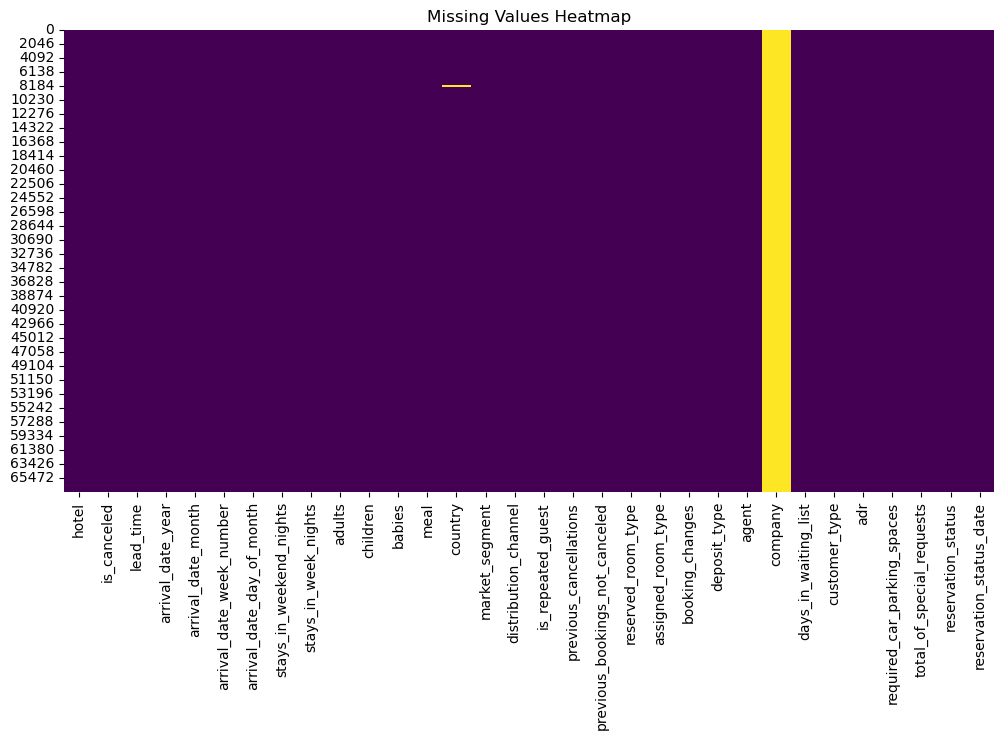

In [21]:
# visualize missing value patterns using heatmap

# set figure size
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [22]:
# Add category and justification to the report
missing_report["Missing Type"] = ["MCAR", "MNAR"]
missing_report["Justification"] = [
    "Small % missing, likely system or entry error",       # country
    "Vast majority not booked via company"               # company
]

print("\nMissing Value Report Table:\n")
print(missing_report)


Missing Value Report Table:

         Missing Values  Percentage Missing Type  \
country             121        0.18         MCAR   
company           67329       99.73         MNAR   

                                         Justification  
country  Small % missing, likely system or entry error  
company           Vast majority not booked via company  


In [23]:
# Task 1.3: Data Quality Assessment

# Check for Duplicate Records
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_count)




Number of duplicate rows: 0



Numerical columns:
 Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


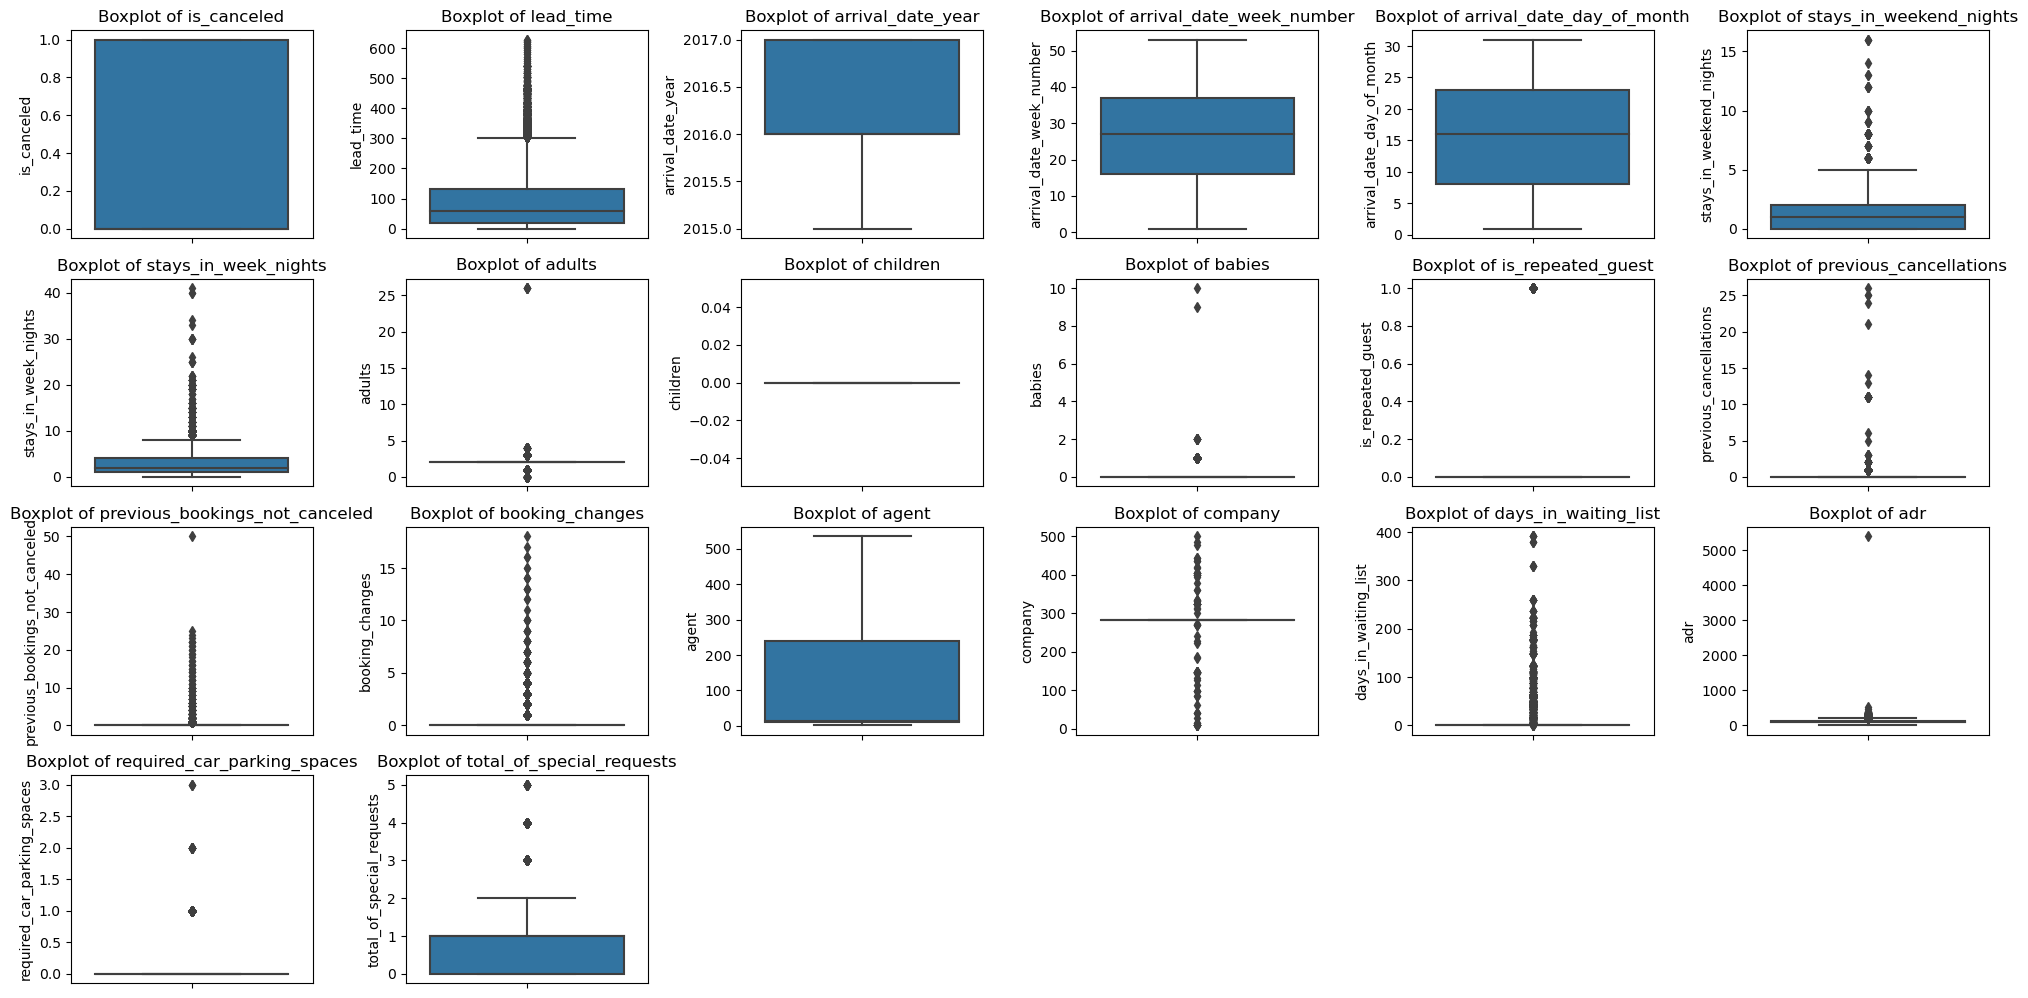

In [24]:
# Identify Potential Outliers in Numerical Columns

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# show numerical columns
print("\nNumerical columns:\n", numerical_cols)

# Create a boxplot for each numerical column to visualize potential outliers
plt.figure(figsize=(20, 15))

for i, col in enumerate(numerical_cols):
    plt.subplot(6, 6, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

In [25]:
# flag potential outliers based on the boxplot
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
outlier_summary = {}

for col in numerical_cols:
    # Calculate the IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    # Store the count of outliers
    outlier_summary[col] = len(outliers)

# Display columns with most outliers
print("Outlier count per numerical column:")
for col, count in sorted(outlier_summary.items(), key=lambda x: -x[1]):
    print(f"{col}: {count}")

# Convert to DataFrame for reporting
outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier Count'])
outlier_df = outlier_df.sort_values(by='Outlier Count', ascending=False)
print("\nOutlier Summary:\n", outlier_df)

Outlier count per numerical column:
adults: 15694
booking_changes: 10736
required_car_parking_spaces: 4581
total_of_special_requests: 1916
lead_time: 1775
adr: 1699
stays_in_week_nights: 1291
is_repeated_guest: 1054
previous_cancellations: 989
previous_bookings_not_canceled: 949
days_in_waiting_list: 748
babies: 629
stays_in_weekend_nights: 181
company: 82
is_canceled: 0
arrival_date_year: 0
arrival_date_week_number: 0
arrival_date_day_of_month: 0
children: 0
agent: 0

Outlier Summary:
                                 Outlier Count
adults                                  15694
booking_changes                         10736
required_car_parking_spaces              4581
total_of_special_requests                1916
lead_time                                1775
adr                                      1699
stays_in_week_nights                     1291
is_repeated_guest                        1054
previous_cancellations                    989
previous_bookings_not_canceled            949
da

In [26]:
# Examine categorical variables for inconsistencies
categorical_cols = df.select_dtypes(include=['object']).columns

print("\nCategorical Variable Summary:\n")
for col in categorical_cols:
    print(f"Column: {col}")
    print(f"Unique Values: {df[col].nunique()}")
    print(f"Sample Values: {df[col].unique()[:5]}")
    print("-" * 40)



Categorical Variable Summary:

Column: hotel
Unique Values: 2
Sample Values: ['Resort Hotel' 'City Hotel']
----------------------------------------
Column: arrival_date_month
Unique Values: 12
Sample Values: ['July' 'August' 'September' 'October' 'November']
----------------------------------------
Column: meal
Unique Values: 5
Sample Values: ['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------
Column: country
Unique Values: 168
Sample Values: ['GBR' 'PRT' 'USA' 'IRL' 'ESP']
----------------------------------------
Column: market_segment
Unique Values: 7
Sample Values: ['Corporate' 'Online TA' 'Direct' 'Offline TA/TO' 'Groups']
----------------------------------------
Column: distribution_channel
Unique Values: 4
Sample Values: ['Corporate' 'TA/TO' 'Direct' 'GDS']
----------------------------------------
Column: reserved_room_type
Unique Values: 8
Sample Values: ['A' 'C' 'D' 'E' 'G']
----------------------------------------
Column: assigned_room_type
Unique Value

In [27]:
# Check for impossible or illogical values 
# "Impossible or illogical values" are data entries that cannot happen in real life or do not make sense logically. These are often caused by errors in data entry, sensor faults, or software bugs.

illogical_conditions = (
    (df['adults'] <= 0) & (df['children'] == 0) & (df['babies'] == 0) |  
    (df['children'] < 0) | # Negative children count
    (df['babies'] < 0) | # Negative babies count
    (df['lead_time'] < 0) | # Negative lead time
    (df['stays_in_weekend_nights'] < 0) | # Negative weekend nights
    (df['stays_in_week_nights'] < 0) | # Negative week nights
    (df['previous_cancellations'] < 0) | # Negative previous cancellations
    (df['previous_bookings_not_canceled'] < 0) | # Negative previous bookings not canceled
    (df['booking_changes'] < 0) | # Negative booking changes
    (df['adr'] < 0) |  # Negative price
    (df['required_car_parking_spaces'] < 0) | # Negative parking spaces
    (df['total_of_special_requests'] < 0) | # Negative special requests
    (df['days_in_waiting_list'] < 0) 
)

# Filtter illogical rows
illogical_rows = df[illogical_conditions]


# Print Summary
print(f"\nTotal number of rows with illogical/impossible values: {len(illogical_rows)}")

# Show some examples of illogical values
if not illogical_rows.empty:
    print("\nSample of illogical rows:")
    print(illogical_rows[['adults', 'children', 'babies', 'lead_time', 'adr']].head())

# remove illogical rows from the dataset
df = df[~illogical_conditions]

# show the shape of the dataset after removing illogical rows
print(f"\nDataset shape after removing illogical rows: {df.shape}")


Total number of rows with illogical/impossible values: 115

Sample of illogical rows:
       adults  children  babies  lead_time   adr
2193        0       0.0       0         36  0.00
2439        0       0.0       0        165  0.00
2445        0       0.0       0        165  0.00
8357        2       0.0       0        195 -6.38
19006       0       0.0       0          4  0.00

Dataset shape after removing illogical rows: (67397, 32)


In [28]:
# Phase 2: Data Cleaning Implementation

# Task 2.1: Handling Missing Values

# 1. Replace NaN in 'children' with 0
df['children'].fillna(0, inplace=True)

# show how many 0s are in 'children' after filling
print("\nNumber of 0s in 'children' after filling NaN with 0:")
print((df['children'] == 0).sum())

print("\nMissing values in 'children' after filling with 0:")
print(df['children'].isnull().sum())




Number of 0s in 'children' after filling NaN with 0:
67397

Missing values in 'children' after filling with 0:
0


In [29]:
# Check how many missing values are in the 'country' column
missing_count = df['country'].isna().sum()
print(f"Missing values in 'country': {missing_count}")

# Check the percentage of missing values
missing_percent = (missing_count / len(df)) * 100
print(f"Percentage of missing values in 'country': {missing_percent:.2f}%")

# See some rows where 'country' is missing to find any pattern
print(df[df['country'].isna()].head())

# Explore other columns for those missing rows to find patterns, e.g. market_segment or distribution_channel
print(df[df['country'].isna()]['market_segment'].value_counts())
print(df[df['country'].isna()]['distribution_channel'].value_counts())

Missing values in 'country': 121
Percentage of missing values in 'country': 0.18%
             hotel  is_canceled  lead_time  arrival_date_year  \
6475  Resort Hotel            1         87               2017   
8039  Resort Hotel            0          7               2016   
8041  Resort Hotel            0          7               2016   
8043  Resort Hotel            0          7               2016   
8046  Resort Hotel            0         11               2016   

     arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
6475              April                        18                         30   
8039            January                         3                         13   
8041            January                         3                         13   
8043          September                        38                         13   
8046           February                         6                          1   

      stays_in_weekend_nights  stays_in_week_n

In [30]:
mode_country = df['country'].mode()[0]
print(f"Most frequent country: {mode_country}")

df['country'].fillna(mode_country, inplace=True)
print("\nMissing values in 'country' after filling with mode:")
print(df['country'].isnull().sum())

Most frequent country: PRT

Missing values in 'country' after filling with mode:
0


In [31]:

# Replace NaN in 'agent' column with 0
df['agent'].fillna(0, inplace=True)

# Replace NaN in 'company' column with 0
df['company'].fillna(0, inplace=True)

# show the data types of 'agent' and 'company' columns
print("\nData types of 'agent' and 'company' columns:")
print(df[['agent', 'company']].dtypes)

df['agent'] = df['agent'].astype(int)
df['company'] = df['company'].astype(int)
# show the data types of 'agent' and 'company' columns after conversion
print("\nData types of 'agent' and 'company' columns after conversion:")    
print(df[['agent', 'company']].dtypes)

# show columns after handling missing values
print("\nColumns after handling missing values:")
print('Missing values in agent:', df['agent'].isnull().sum())
print('Missing values in company:', df['company'].isnull().sum())
print('Missing values in country:', df['country'].isnull().sum())



Data types of 'agent' and 'company' columns:
agent      float64
company    float64
dtype: object

Data types of 'agent' and 'company' columns after conversion:
agent      int32
company    int32
dtype: object

Columns after handling missing values:
Missing values in agent: 0
Missing values in company: 0
Missing values in country: 0


In [32]:
# show the first 5 rows of the dataset after handling missing values
print("\nFirst 5 rows after handling missing values:")
print(df.head())


First 5 rows after handling missing values:
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0         13               2015               July   
1  Resort Hotel            0         14               2015               July   
2  Resort Hotel            0          9               2015               July   
3  Resort Hotel            1         85               2015               July   
4  Resort Hotel            1         75               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0              

In [33]:
# check if there are any remaining missing values in the dataset
remaining_missing = df.isnull().sum().sum()
print(f"\nTotal remaining missing values in the dataset: {remaining_missing}")


Total remaining missing values in the dataset: 0


In [34]:
# Task 2.2: Duplicate Detection and Removal

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")



Number of duplicate rows: 6


In [35]:
print("\nShape of dataset before removing duplicates:", df.shape)

# Remove exact duplicates and keep the first occurrence
df = df.drop_duplicates()

# Confirm removal
print(f"Shape of dataset after removing exact duplicates: {df.shape}")



Shape of dataset before removing duplicates: (67397, 32)
Shape of dataset after removing exact duplicates: (67391, 32)


In [36]:
# 1. Remove EXACT duplicates (all columns identical)
exact_duplicates = df.duplicated()
print(f"Exact duplicates: {exact_duplicates.sum()}")  # Should be small (~30-50)
df = df.drop_duplicates(keep='first')

# 2. Check NEAR-duplicates (only key columns, keep FIRST occurrence)
subset_cols = ['hotel', 'arrival_date_year', 'arrival_date_month', 
               'arrival_date_day_of_month', 'adults', 'children', 'babies']

# Near-duplicates = additional copies beyond the first
near_duplicates = df.duplicated(subset=subset_cols, keep='first')
print(f"Near-duplicates (additional copies): {near_duplicates.sum()}") 

# Total unique bookings (first occurrence of each near-duplicate)
unique_bookings = df[~near_duplicates]
print(f"Unique bookings: {len(unique_bookings)}")
print(f"Final dataset shape: {df.shape}")

Exact duplicates: 0
Near-duplicates (additional copies): 62772
Unique bookings: 4619
Final dataset shape: (67391, 32)


In [37]:
# Task 2.3: Outlier Detection and Treatment 
# Columns to check for outliers
num_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
            'adults', 'children', 'babies', 'adr']

# IQR method for outlier detection
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} outliers detected by IQR: {outliers.shape[0]}")
    return outliers.index

# Detect outliers for each numerical column using IQR
outlier_indices = set()
for col in num_cols:
    outlier_idx = detect_outliers_iqr(df, col)
    outlier_indices.update(outlier_idx)

 


lead_time outliers detected by IQR: 1773
stays_in_weekend_nights outliers detected by IQR: 177
stays_in_week_nights outliers detected by IQR: 1282
adults outliers detected by IQR: 15577
children outliers detected by IQR: 0
babies outliers detected by IQR: 629
adr outliers detected by IQR: 1699


In [38]:
# Calculate z-scores for all numerical columns and mark outliers with threshold > 3
from scipy import stats
z_scores = np.abs(stats.zscore(df[num_cols]))

# Rows with any z-score > 3 in these columns
outliers_z = np.where(z_scores > 3)[0]
print(f"Number of rows with z-score outliers (>3): {len(set(outliers_z))}")


Number of rows with z-score outliers (>3): 2983


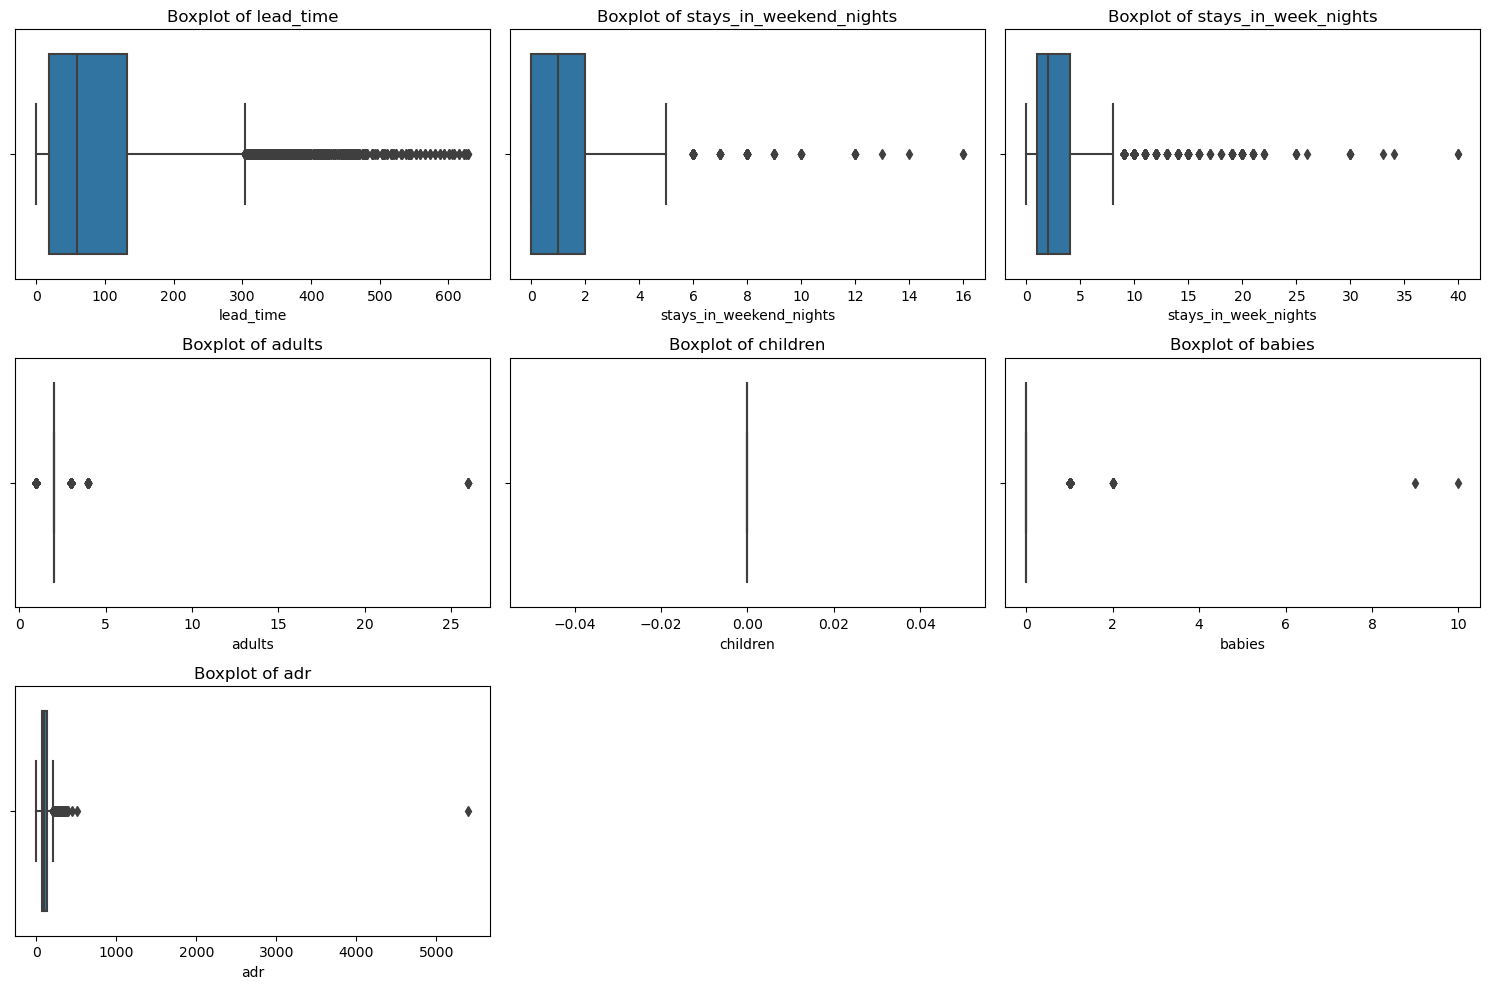

In [39]:
# Boxplot to visualize outliers
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


In [40]:
# Capping outliers at IQR bounds
def cap_outliers(df, col, multiplier=3.0):  # Increased from 1.5 to 3.0
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

for col in num_cols:
    cap_outliers(df, col)

# Show the first 5 rows after capping outliers
print("\nFirst 5 rows after capping outliers:")
print(df.head())

# show the final shape of the dataset after all cleaning steps
print("\nFinal dataset shape after all cleaning steps:", df.shape)




First 5 rows after capping outliers:
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0       13.0               2015               July   
1  Resort Hotel            0       14.0               2015               July   
2  Resort Hotel            0        9.0               2015               July   
3  Resort Hotel            1       85.0               2015               July   
4  Resort Hotel            1       75.0               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                      0.0                   1.

In [41]:
# Task 2.4: Data Inconsistency Fixes
# Convert all country codes to uppercase
df['country'] = df['country'].str.upper()

# Example fix for common typos (replace 'UNK' with 'UNKNOWN')
df['country'] = df['country'].replace({'UNK': 'UNKNOWN'})

# Check unique country codes after standardization
print("Unique country codes after standardization:", df['country'].unique())

# SHow the first 5 rows after data cleaning
print("\nFirst 5 rows after data cleaning:")
print(df.head())

# Show all the columns after data cleaning
print("\nColumns after data cleaning:")
print(df.columns.tolist())


Unique country codes after standardization: ['GBR' 'PRT' 'USA' 'IRL' 'ESP' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU' 'FRA'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'DNK' 'RUS' 'SWE' 'AUS' 'CZE' 'BRA' 'FIN'
 'MOZ' 'NLD' 'SVN' 'ALB' 'CHN' 'MEX' 'MAR' 'UKR' 'LVA' 'PRI' 'CHL' 'EST'
 'AUT' 'BLR' 'LTU' 'LUX' 'TUR' 'IND' 'CYM' 'ZWE' 'DZA' 'ZAF' 'KOR' 'CRI'
 'ARE' 'TUN' 'HRV' 'HKG' 'ISR' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF'
 'CYP' 'COL' 'GGY' 'KWT' 'NGA' 'HUN' 'MDV' 'SVK' 'IDN' 'LBN' 'PHL' 'SYC'
 'AGO' 'BHR' 'NZL' 'KAZ' 'THA' 'DOM' 'MYS' 'VEN' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'MUS' 'JAM' 'UGA' 'BGR' 'CIV' 'SRB' 'JOR' 'SYR' 'SGP' 'BDI' 'VNM'
 'PLW' 'QAT' 'EGY' 'SUR' 'MLT' 'MWI' 'ISL' 'ECU' 'NPL' 'CPV' 'BHS' 'PAK'
 'MAC' 'TGO' 'TWN' 'AZE' 'SEN' 'PER' 'SAU' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'ZMB' 'KHM' 'MCO' 'BGD' 'UZB' 'IMN' 'TJK' 'BEN' 'VGB' 'TZA' 'GAB' 'MKD'
 'BIH' 'GHA' 'TMP' 'GLP' 'KEN' 'LIE' 'GNB' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN'
 'BFA' 'LBY' 'MLI' 'NAM' 'BOL' 'PRY' 'BRB' 'ABW' 'SLV' 'DMA' 'PYF' 'GUY'
 'LCA' '

In [42]:
# fix date format inconsistencies
# Convert reservation_status_date to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

# Check for any parsing errors (NaT values)
print(f"Number of invalid dates: {df['reservation_status_date'].isna().sum()}")

# show the first 5 rows after fixing date format
print("\nFirst 5 rows after fixing date format:")
print(df.head())


Number of invalid dates: 0

First 5 rows after fixing date format:
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0       13.0               2015               July   
1  Resort Hotel            0       14.0               2015               July   
2  Resort Hotel            0        9.0               2015               July   
3  Resort Hotel            1       85.0               2015               July   
4  Resort Hotel            1       75.0               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                 

In [43]:

# Only remove if BOTH zero guests AND logically impossible
invalid_guests = df[(df['adults'] == 0) & 
                    (df['children'] == 0) & 
                    (df['babies'] == 0) &
                    (df['reservation_status'] == 'Check-Out')]  # Illogical: checked out with zero guests
df = df.drop(invalid_guests.index)

print(f"Dataset shape after removing zero guest rows: {df.shape}")

# Show the first 5 rows after removing zero guest rows
print("\nFirst 5 rows after removing zero guest rows:")
print(df.head())


Dataset shape after removing zero guest rows: (67391, 32)

First 5 rows after removing zero guest rows:
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0       13.0               2015               July   
1  Resort Hotel            0       14.0               2015               July   
2  Resort Hotel            0        9.0               2015               July   
3  Resort Hotel            1       85.0               2015               July   
4  Resort Hotel            1       75.0               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ..

In [44]:
# Check for negative values in numerical columns
num_cols = ['adults', 'children', 'babies', 'stays_in_weekend_nights', 'stays_in_week_nights']
negative_vals = df[(df[num_cols] < 0).any(axis=1)]

print(f"Number of rows with negative values in guests or stays: {len(negative_vals)}")

# Remove those rows if any
df = df[~((df[num_cols] < 0).any(axis=1))]

print(f"Dataset shape after removing negative value rows: {df.shape}")
# Show the first 5 rows after removing negative value rows
print("\nFirst 5 rows after removing negative value rows:")
print(df.head())

Number of rows with negative values in guests or stays: 0
Dataset shape after removing negative value rows: (67391, 32)

First 5 rows after removing negative value rows:
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0       13.0               2015               July   
1  Resort Hotel            0       14.0               2015               July   
2  Resort Hotel            0        9.0               2015               July   
3  Resort Hotel            1       85.0               2015               July   
4  Resort Hotel            1       75.0               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          

In [45]:
print("\n✅ Data Inconsistency Fixes completed:")
print(f"Total rows after cleaning: {df.shape[0]}")



✅ Data Inconsistency Fixes completed:
Total rows after cleaning: 67391


In [46]:
# print the data after cleaning
print("\nData after cleaning:")
print(df.head())


# Store original dataset shape and missing values before cleaning
df_original = pd.read_csv('E:\HORIZON CAMPUS\AASEMESTER6\Intelligent Systems\itbin-2211-0260_data_cleaning\data\hotel_bookings.csv')

# Show original dataset shape and missing values
df_original_rows, df_original_cols = df_original.shape


Data after cleaning:
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0       13.0               2015               July   
1  Resort Hotel            0       14.0               2015               July   
2  Resort Hotel            0        9.0               2015               July   
3  Resort Hotel            1       85.0               2015               July   
4  Resort Hotel            1       75.0               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                      0.0                   1.0     2.0  ...  

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\HORIZON CAMPUS\\AASEMESTER6\\Intelligent Systems\\itbin-2211-0260_data_cleaning\\data\\hotel_bookings.csv'

In [ ]:
# Phase 3: Data Validation and Documentation
# check that total number of guests > 0
invalid_guests = df[(df['adults'] <= 0) & (df['children'] <= 0) & (df['babies'] <= 0)]
print(f"\nNumber of rows with invalid guests (adults, children, babies all <= 0): {len(invalid_guests)}")


Number of rows with invalid guests (adults, children, babies all <= 0): 0


In [ ]:
# Create a column that combines year, month, and a dummy day (e.g., 1st of each month)
df['arrival_date_combined'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-01',
    format='%Y-%B-%d'
)

# Now check the earliest and latest arrival dates
print("\nChecking arrival dates...")
print("Earliest arrival date:", df['arrival_date_combined'].min())
print("Latest arrival date:", df['arrival_date_combined'].max())


Checking arrival dates...
Earliest arrival date: 2015-07-01 00:00:00
Latest arrival date: 2017-08-01 00:00:00


In [ ]:
# check for numerical value ranges
print("Minimum lead_time:", df['lead_time'].min())
print("Minimum adr:", df['adr'].min())

Minimum lead_time: 0
Minimum adr: 0.0


In [ ]:
# validate categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nValidating categorical columns:")
for col in categorical_cols:
    unique_values = df[col].unique()
    print(f"{col}: {len(unique_values)} unique values")
    print(f"Sample values: {unique_values[:5]}")
    print("-" * 40)



Validating categorical columns:
hotel: 2 unique values
Sample values: ['Resort Hotel' 'City Hotel']
----------------------------------------
arrival_date_month: 12 unique values
Sample values: ['July' 'August' 'September' 'October' 'November']
----------------------------------------
meal: 5 unique values
Sample values: ['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------
country: 177 unique values
Sample values: ['PRT' 'GBR' 'USA' 'ESP' 'IRL']
----------------------------------------
market_segment: 8 unique values
Sample values: ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary']
----------------------------------------
distribution_channel: 5 unique values
Sample values: ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
----------------------------------------
reserved_room_type: 9 unique values
Sample values: ['C' 'A' 'D' 'E' 'G']
----------------------------------------
assigned_room_type: 11 unique values
Sample values: ['C' 'A' 'D' 'E' 'G']
-

In [ ]:
# Task 3.3: Final Dataset Preparation
df.to_csv('E:\HORIZON CAMPUS\AASEMESTER6\Intelligent Systems\itbin-2211-0260_data_cleaning\data\hotel_bookings_cleaned.csv', index=False)
print("\nFinal cleaned dataset saved to 'hotel_bookings_cleaned.csv'")


Final cleaned dataset saved to 'hotel_bookings_cleaned.csv'


# Advanced Extensions

#Extension 1: Feature Engineering

Create New, Meaningful Features

In [ ]:
# Total nights stayed
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
print("\nTotal nights stayed column added.")
print("First 5 rows with total_nights:")
print(df[['stays_in_weekend_nights', 'stays_in_week_nights', 'total_nights']].head())

# Total guests
df['total_guests'] = df['adults'] + df['children'] + df['babies']
print("\nTotal guests column added.")
print("First 5 rows with total_guests:")
print(df[['adults', 'children', 'babies', 'total_guests']].head())

# Was the booking modified?
df['is_modified'] = df['booking_changes'].apply(lambda x: 1 if x > 0 else 0)
print("\nBooking modification status column added.")
print("First 5 rows with is_modified:")
print(df[['booking_changes', 'is_modified']].head())



Total nights stayed column added.
First 5 rows with total_nights:
   stays_in_weekend_nights  stays_in_week_nights  total_nights
0                        0                     0             0
1                        0                     0             0
2                        0                     1             1
3                        0                     1             1
4                        0                     2             2

Total guests column added.
First 5 rows with total_guests:
   adults  children  babies  total_guests
0       2       0.0       0           2.0
1       2       0.0       0           2.0
2       2       0.0       0           2.0
3       2       0.0       0           2.0
4       2       0.0       0           2.0

Booking modification status column added.
First 5 rows with is_modified:
   booking_changes  is_modified
0                3            1
1                4            1
2                0            0
3                0            0
4        

Derive Booking Patterns / Seasonal Indicators

In [ ]:
# High Season or Not (Assuming July & August as high season)
df['is_high_season'] = df['arrival_date_month'].isin(['July', 'August']).astype(int)

# Weekday or weekend check-in (you must convert full date first)
df['full_arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'] + '-' +
    df['arrival_date_day_of_month'].astype(str),
    format='%Y-%B-%d'
)

df['arrival_day_of_week'] = df['full_arrival_date'].dt.day_name()

print("\nArrival day of week column added.")
print("First 5 rows with arrival_day_of_week:")
print(df[['full_arrival_date', 'arrival_day_of_week']].head())



Arrival day of week column added.
First 5 rows with arrival_day_of_week:
  full_arrival_date arrival_day_of_week
0        2015-07-01           Wednesday
1        2015-07-01           Wednesday
2        2015-07-01           Wednesday
3        2015-07-01           Wednesday
4        2015-07-01           Wednesday


Estimate Customer Lifetime Value Proxy

In [ ]:
# Use total nights * adr as a proxy for total revenue per booking
df['booking_revenue'] = df['total_nights'] * df['adr']
print("\nBooking revenue column added.")
print("First 5 rows with booking_revenue:")
print(df[['total_nights', 'adr', 'booking_revenue']].head())


Booking revenue column added.
First 5 rows with booking_revenue:
   total_nights   adr  booking_revenue
0             0   0.0              0.0
1             0   0.0              0.0
2             1  75.0             75.0
3             1  75.0             75.0
4             2  98.0            196.0


Extension 2: Automated Cleaning Pipeline

In [ ]:
# Reusable functions for cleaning
def fill_missing_values(df):
    df['children'].fillna(0, inplace=True)
    df['country'].fillna('Unknown', inplace=True)
    df['agent'].fillna(0, inplace=True)
    df['company'].fillna(0, inplace=True)
    return df

def remove_duplicates(df):
    df.drop_duplicates(inplace=True)
    return df

def remove_zero_guests(df):
    return df[(df['adults'] + df['children'] + df['babies']) > 0]

print("\nData cleaning functions defined for reusability.")



Data cleaning functions defined for reusability.


In [ ]:
# Full Cleaning Pipeline Function
def clean_hotel_data(df):
    df = fill_missing_values(df)
    df = remove_duplicates(df)
    df = remove_zero_guests(df)
    # Add more steps as needed
    return df

# Apply the cleaning pipeline
df_cleaned = clean_hotel_data(df)

print("\nData cleaning pipeline applied.")



Data cleaning pipeline applied.


Extension 3: Quality Metrics

In [ ]:
def generate_quality_report(df_before, df_after):
    print("💡 Data Quality Report")
    print("Rows before:", df_before.shape[0])
    print("Rows after:", df_after.shape[0])
    print("Missing before:\n", df_before.isnull().sum()[df_before.isnull().sum() > 0])
    print("Missing after:\n", df_after.isnull().sum()[df_after.isnull().sum() > 0])
    print("Duplicates before:", df_before.duplicated().sum())
    print("Duplicates after:", df_after.duplicated().sum())

generate_quality_report(df, df_cleaned)


💡 Data Quality Report
Rows before: 86886
Rows after: 86886
Missing before:
 Series([], dtype: int64)
Missing after:
 Series([], dtype: int64)
Duplicates before: 0
Duplicates after: 0



Data quality improved:


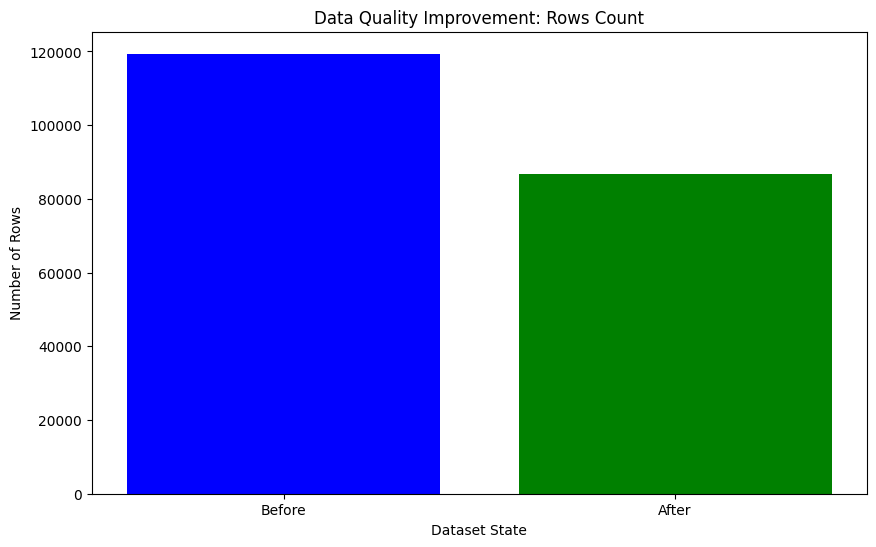

In [ ]:
# data quality improvement
print("\nData quality improved:")

#comparison bar chart
plt.figure(figsize=(10, 6))
df_before = df_original.copy()
df_after = df_cleaned.copy()
plt.bar(['Before', 'After'], [df_before.shape[0], df_after.shape[0]], color=['blue', 'green'])
plt.title('Data Quality Improvement: Rows Count')
plt.xlabel('Dataset State')
plt.ylabel('Number of Rows')
plt.show()